<a href="https://colab.research.google.com/github/laprass/drive/blob/main/%5Bn132a%5D_intermediate_linear_algebra_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 2*

# 📝 Assignment


## 1. 주어진 리스트에 대해서 평균, 분산, 표준편차를 구하는 함수를 작성해보세요. (`mean`같은 builtin function 제외)


- 이후 다음 데이터 [243, 278, 184, 249, 207] 에 대해서 해당 함수를 사용한 결과를 보이세요.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [26]:
# 평균

def mymean(v):
    total = 0
    for i in v :
        total += i
    mean = total / len(v)
    return mean

In [27]:
mymean([243, 278, 184, 249, 207])==232.2

True

In [28]:
# 분산

def myvar(v):
    total = 0
    for i in v:
        total += (i-mymean(v))**2
    var = total / len(v)
    return var

In [29]:
myvar([243, 278, 184, 249, 207])==1090.96

True

In [30]:
# 표준편차 

def mystd(v):
    std = myvar(v)**(1/2)
    return std

In [31]:
round(mystd([243, 278, 184, 249, 207]), 3) == 33.030

True

In [32]:
res1 = mymean([243, 278, 184, 249, 207])
res2 = myvar([243, 278, 184, 249, 207])
res3 = mystd([243, 278, 184, 249, 207])

print('mean = {}, var = {}, std_error= {}'.format(res1,res2,res3))

mean = 232.2, var = 1090.96, std_error= 33.02968361943541


## 2. 위에서 사용된 데이터와 다음 데이터의 공분산과, 상관계수를 구해보세요 [88, 89, 83, 112, 104] 

In [33]:
x = [243, 278, 184, 249, 207]
y = [88, 89, 83, 112, 104]

In [34]:
# 공분산
# zip 메소드(for문) 참고 : https://ponyozzang.tistory.com/578

def cov(v1,v2):
    dev = 0
    count = 0
    for a,b in zip(v1,v2): # zip 기능 너무 좋다.
        dev += (a-mymean(v1))*(b-mymean(v2))
        count += 1    
    fin = dev / count
    return fin    

# 상관계수

def cor(v1,v2):
    covar = cov(v1,v2)
    xy_var = myvar(v1) * myvar(v2)
    fin = covar / (xy_var**(1/2))
    return fin

print('cov = {}, cor = {}'.format(round(cov(x,y),3), round(cor(x,y),3)))

cov = 57.36, cor = 0.159


In [35]:
'''공분산은 numpy와 다르게 나왔다.
하지만 공분산 함수와 연계된 상관계수는 numpy와 동일한 값이 나왔다.
Why?'''

'공분산은 numpy와 다르게 나왔다.\n하지만 공분산 함수와 연계된 상관계수는 numpy와 동일한 값이 나왔다.\nWhy?'

In [36]:
# numpy 활용

res4 = np.cov(x,y)[0,1]       # 공분산
res5 = np.corrcoef(x, y)[0,1] # 상관계수

print('cov = {}, cor = {} bt numpy'.format(round(res4,3), round(res5,3)))

cov = 71.7, cor = 0.159 bt numpy


## 3. 다음 벡터들의 span과, 이가 의미하는 바를 설명하세요. 

\begin{align}
g = \begin{bmatrix} 1 & 3 \end{bmatrix}
\qquad
h = \begin{bmatrix} 2 & 6 \end{bmatrix}
\end{align}

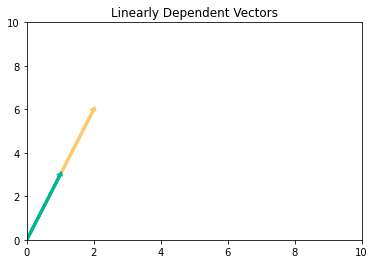

In [37]:
plt.xlim(0, 10)          
plt.ylim(0, 10)

g = [1,3] 
h = [2,6]

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0 * x_vals

plt.plot(x_vals, y_vals, '--', color = '#0984e3', linewidth = 1)
plt.arrow(0, 0, h[0], h[1], linewidth = 3, head_width = .05, head_length = .05, color = '#fdcb6e')
plt.arrow(0, 0, g[0], g[1], linewidth = 3, head_width = .05, head_length = .05, color = '#00b894')

plt.title("Linearly Dependent Vectors")
plt.show()

In [38]:
# 차트에서 보듯이 g와 h는 선형관계에 있다.
# 이런 경우 2차원의 매트릭스 조합이지만 SPAN은 1차원(선)만 표현이 가능하다.

In [39]:
res6 = np.linalg.matrix_rank(np.array([g,h]))

print('numpy로 계산한 결과 g와 h의 span은 {}차원으로 설명할 수 있다.'.format(res6))

numpy로 계산한 결과 g와 h의 span은 1차원으로 설명할 수 있다.


In [40]:
res6 == 1

True

## 4. 다음 벡터들의 span과, 이가 의미하는 바를 설명하세요.

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [41]:
l = np.array([1,2,3])
m = np.array([-1,0,7])
n = np.array([4,8,2])

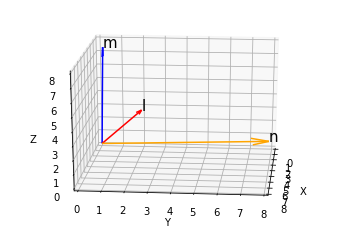

In [42]:
# 참고사이트 : http://naver.me/xnKnHV1v

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.quiver(0, 0, 0, l[0], l[1], l[2], color ='red', arrow_length_ratio=0.1)
ax.text(l[0], l[1], l[2], 'l', size = 15)
ax.quiver(0, 0, 0, m[0], m[1], m[2], color ='blue', arrow_length_ratio=0.1)
ax.text(m[0], m[1], m[2], 'm', size = 15)
ax.quiver(0, 0, 0, n[0], n[1], n[2], color ='orange', arrow_length_ratio=0.1)
ax.text(n[0], n[1], n[2], 'n', size = 15)


ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
ax.set_zlim(0, 8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=20, azim =5)
ax.grid()

plt.show()

In [43]:
## 3D 차트를 보더라도 3개의 벡터간에 선형관계는 발견되지 않는다.

In [44]:
res7 = np.linalg.matrix_rank(np.array([l,m,n]))

print('numpy로 계산한 결과 l,m,n의 span은 {}차원으로 설명할 수 있다.'.format(res7))

numpy로 계산한 결과 l,m,n의 span은 3차원으로 설명할 수 있다.


In [45]:
res7 == 3

True

## 5. 다음 매트릭스의 rank를 구하세요

\begin{align}
P = \begin{bmatrix} 
0 & 2 & 5 \\
 3 & 6 & 12 \\
3 & 2 & 2
\end{bmatrix}
\end{align}

In [ ]:
p = np.array([[0,2,5],[3,6,12],[3,2,2]])

res8 = np.linalg.matrix_rank(p)

cor_p = round(cor(p[0],p[1]),4)

print('1행렬과 2행렬은 {}라는 높은 상관계수가 있다. 따라서 1행과 2행의 선형관계를 의심해 볼 수 있다'.format(cor_p))
print('numpy로 계산한 결과 rank는 {}이 아닌 {}이다.'.format(len(p),res8))

First Basis Vector a
type x coordinate: 0
type y coordinate: 2
type z coordinate: 5

Second Basis Vector b
type x coordinate: 3
type y coordinate: 6
type z coordinate: 12

Third Basis Vector c
type x coordinate: 3
type y coordinate: 2
type z coordinate: 2


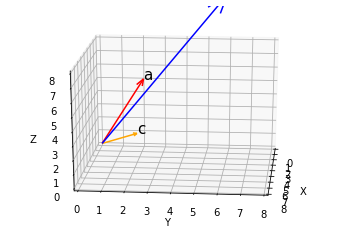

In [48]:
# 참고사이트 : http://naver.me/xnKnHV1v

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print("First Basis Vector a")

x1 = input("type x coordinate: ")
y1 = input("type y coordinate: ")
z1 = input("type z coordinate: ")
a = np.array([float(x1), float(y1), float(z1)])


print()
print("Second Basis Vector b")

x2 = input("type x coordinate: ")
y2 = input("type y coordinate: ")
z2 = input("type z coordinate: ")
b = np.array([float(x2), float(y2), float(z2)])


print()
print("Third Basis Vector c")

x3 = input("type x coordinate: ")
y3 = input("type y coordinate: ")
z3 = input("type z coordinate: ")
c = np.array([float(x3), float(y3), float(z3)])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.quiver(0, 0, 0, a[0], a[1], a[2], color ='red', arrow_length_ratio=0.1)
ax.text(a[0], a[1], a[2], 'a', size = 15)
ax.quiver(0, 0, 0, b[0], b[1], b[2], color ='blue', arrow_length_ratio=0.1)
ax.text(b[0], b[1], b[2], 'b', size = 15)
ax.quiver(0, 0, 0, c[0], c[1], c[2], color ='orange', arrow_length_ratio=0.1)
ax.text(c[0], c[1], c[2], 'c', size = 15)


ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
ax.set_zlim(0, 8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=20, azim =5)
ax.grid()

plt.show()

In [50]:
res8 == 2

True

## Grading

이전 과제를 완료했다면, 아래의 코드를 실행하세요.



In [51]:
def grade(mymean, myvar, mysd, res1, res2, res3, res4, res5, res6, res7, res8):
  score = 0
  score += (mymean([243, 278, 184, 249, 207])==232.2)
  score += (myvar([243, 278, 184, 249, 207])==1090.96)
  score += (round(mystd([243, 278, 184, 249, 207]), 3) == 33.030) # 1
  score += (round(res4, 3) == 71.7) # 2-1
  score += (round(res5, 3) == 0.159) # 2-2
  score += (res6 == 1) # 3
  score += (res7 == 3) # 4
  score += (res8 == 2) # 5
  return score

In [52]:
grade(mymean, myvar, mystd, res1, res2, res3, res4, res5, res6, res7, res8)

8

# 🔥 도전과제 

주어진 데이터 (x, y)에 대해서 `y = x` 라는 벡터에 대해 projection을 계산하는 함수를 작성하세요. 
- (x, y) 는 (0, 0) 에서 (x, y)로 가는 벡터라 가정합니다.

이후

- 입력된 데이터를 파란색 선으로, 
- `y = x` 라는 벡터를 빨간색 선으로, 마지막으로 
- projection 된 선을 녹색 점선(dashed)으로 그래프에 그리세요.

In [53]:
v = np.array([7, 4])

xy = np.array([5,5]) # x = y이므로 임의의 2x1행렬인 10,10으로 가정한다.

def myProjection(a,b):
    size_a = np.linalg.norm(a) # 1) 투영의 주체(=몸)의 벡터의 크기를 구하고
    size_b = np.linalg.norm(b) # 2) 투영할 대상(=땅)의 벡터의 크기를 구하고
    p_size = (a*b) / size_b    # 3) 투영벡터의 크기를 구해주고
    unit_v = b / size_b        # 4) 투영할 대상의 단위 벡터를 구한 후
    pro_j = p_size * unit_v    # 5) 투영벡터크기와 단위벡터를 곱해주면 투영된 벡터를 구할 수 있다.
    return pro_j

vprime = myProjection(v,xy)

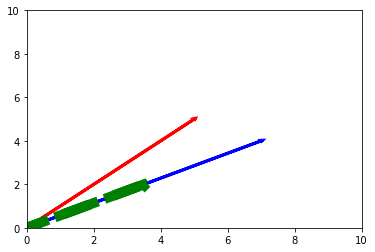

In [54]:
plt.xlim(0, 10)          
plt.ylim(0, 10)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0 * x_vals

plt.plot(x_vals, y_vals, '--', color = '#0984e3', linewidth = 1)
plt.arrow(0, 0, v[0], v[1], linewidth = 3, head_width = .05, head_length = .05, color = 'blue')
plt.arrow(0, 0, xy[0], xy[1], linewidth = 3, head_width = .05, head_length = .05, color = 'red')
plt.arrow(0, 0, vprime[0], vprime[1], linestyle='dashed',  linewidth = 10, head_width = .1, head_length = .1, color = 'green')

plt.show()